# Support Vector Machine (SVM)

## Introduction

- Last week we finished the lecture by learning about the Perceptron.
- Iterative algorithm that will become very useful in the next lectures.
- But, also some serious limitations:
    - No training error -> assumes linear separability.
    - Not unique $\mathbf{w}$.
- Consider the following example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

number_of_samples_in_each_class = 100

np.random.seed(3)

mu1 = np.array([1, 1])
mu2 = np.array([3.0, 3.0])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x_train_1 = np.random.multivariate_normal(mu1, sigma, number_of_samples_in_each_class)
x_train_2 = np.random.multivariate_normal(mu2, sigma, number_of_samples_in_each_class)
x_train = np.concatenate((x_train_1, x_train_2))
y_train = np.concatenate((np.ones(number_of_samples_in_each_class), np.zeros(number_of_samples_in_each_class)))


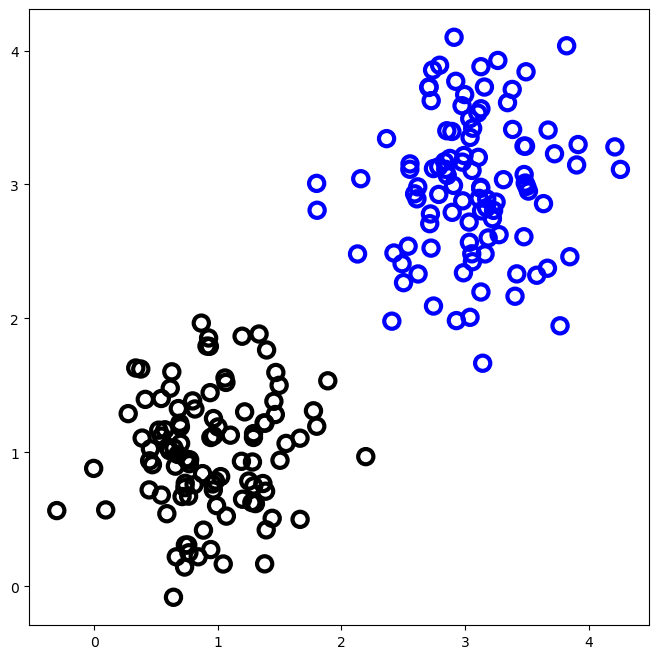

In [2]:
plt.figure(1, figsize=(8, 8))
plt.scatter(x_train_1[:, 0], x_train_1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x_train_2[:, 0], x_train_2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.show()

## Support Vector Machine (SVM)

- Find $$g(\mathbf{x})=\mathbf{w}^T\mathbf{x}+w_0$$ such that the **margin** $m_{\text{svm}}$ is maximum (optimal).
    - Leaves room for variation between training data and test data.
    - **Generalizes** better.

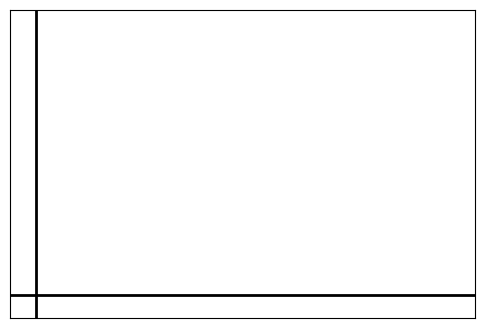

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.axhline(0, color='black', linewidth=2)  # y-axis
plt.axvline(0, color='black', linewidth=2)  # x-axis
plt.xlim(-0.3, 5)
plt.ylim(-0.4, 5)
plt.xticks([])
plt.yticks([])
plt.show()

### Support Vector Machine (SVM)

- Note: $g(\mathbf{x'})$ not unique: $$\mathbf{w'}=a\mathbf{w}$$
- Define: $$g(\mathbf{x'})= \pm 1 \hspace{0.1cm} \text{for $\mathbf{x}$ on margin.}$$ 
- Hence: $$m_{\text{svm}}=\frac{2}{||\mathbf{w}||}$$

## SVM optimization problem

- $$ \underset{\mathbf{w}, w_0}{\operatorname{min}}\ J(\mathbf{w}, w_0)\coloneqq \frac{1}{2}||\mathbf{w}||^2 $$
- $$ \text{subject to} \hspace{0.2cm} y_i\left(\mathbf{w}^T \mathbf{x_i}+w_0\right) \geq 1$$
- "A training algorithm for optimal margin classifiers" - (Boser, Guyon, Vapnik, 1992.)
- "Support-vector networks" - (Cortes and Vapnik, 1995.)
- How to optimize the objective function?
    - Lagrange multipliers!

### Hint on Lagrangian optimization

- $$ \underset{\boldsymbol{\theta}}{\operatorname{min}}\ J(\boldsymbol{\theta}) $$
- $$ \text{subject to} \hspace{0.2cm} f(\boldsymbol{\theta})= \theta_1 \theta_2-3 \geq 0 $$
- Primal problem $\boldsymbol{\theta}$.
- Note: At $\boldsymbol{\theta}=\boldsymbol{\theta}_{*}\Rightarrow$ $$ \frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta}) = \lambda\frac{\partial}{\partial \boldsymbol{\theta}} f(\boldsymbol{\theta}) \text{, for } \lambda \gt 0$$


### Defining the Lagrange function

- $$ L(\boldsymbol{\theta}, \lambda)=J(\boldsymbol{\theta})-\lambda f(\boldsymbol{\theta}) $$
- Then: $$ \underset{\boldsymbol{\theta}}{\operatorname{min}}\ L(\boldsymbol{\theta}, \lambda)  \Rightarrow \frac{\partial}{\partial \boldsymbol{\theta}}J(\boldsymbol{\theta}) - \lambda \frac{\partial}{\partial \boldsymbol{\theta}}f(\boldsymbol{\theta}) = 0$$

### Illustrating the Lagrangian

- $$ \underset{\boldsymbol{\theta}}{\operatorname{min}}\ J(\boldsymbol{\theta}) $$
- $$ \text{subject to} \hspace{0.2cm} f_i(\boldsymbol{\theta}) \geq 0 \hspace{0.2cm} \text{for } i=1,\cdots,N $$

### Illustrating the Lagrangian

- Note: Only one solution $\boldsymbol{\theta}$.
- Due to $J(\boldsymbol{\theta})$ being convex and feasible region being a convex set.
- Langrange function: $$ L(\boldsymbol{\theta}, \lambda)=J(\boldsymbol{\theta})-\sum_{i=1}^N\lambda_i f_i(\boldsymbol{\theta}) $$
- Then:  $$ \frac{\partial}{\partial \boldsymbol{\theta}} L(\boldsymbol{\theta}, \lambda)= \frac{\partial}{\partial \boldsymbol{\theta}}J(\boldsymbol{\theta})-\sum_{i=1}^N\lambda_i \frac{\partial}{\partial \boldsymbol{\theta}}f_i(\boldsymbol{\theta})=\mathbf{0}$$


### Illustrating the Lagrangian

- Note: only one **active** constraint: $$f_1(\boldsymbol{\theta})=0$$
- $\Rightarrow$ $$\lambda_1 \geq 0, \hspace{0.1cm} \lambda_2 = 0, \hspace{0.1cm} \lambda_3 = 0$$
- Draw $\Rightarrow$

### Karush-Kuhn-Tucker (KKT)

- The SVM optimization objective is a nonlinear optimization task subject to a set of linear constraints.
- Difficult to optimize, how do we konw if a solution is optimal?
- The Karush-Kuhn-Tucker conditions is a well-known set of conditions for optimality in nonlinear optimization.
- At $\boldsymbol{\theta}=\boldsymbol{\theta}_*$: $$\frac{\partial}{\partial \boldsymbol{\theta}} L(\boldsymbol{\theta}, \lambda) = \mathbf{0} \\ \lambda_i f_i(\boldsymbol{\theta}) = 0 \\ \lambda_i \geq 0$$

### Dual problem ($\lambda$)

- Note: $$ \underset{\boldsymbol{\lambda} \geq 0}{\operatorname{max}}\ L(\boldsymbol{\theta}_*, \lambda) = J(\boldsymbol{\theta}_*)-\sum_{i=1}^N\lambda_i f_i(\boldsymbol{\theta}_*) $$
- actually forces $\lambda_i f_i(\boldsymbol{\theta}_*)=0$ since $\lambda_i \geq 0$ and $f_i(\boldsymbol{\theta}_*) \geq 0$.
- Hence: $$ \underset{\boldsymbol{\lambda} \geq 0}{\operatorname{max}}\ L(\boldsymbol{\theta}_*, \lambda) = J(\boldsymbol{\theta}_*)$$


### Primal versus dual problem

- Putting it all together:


### SVM Lagrangian

The Lagrangian for the SVM optimization problem is:

$$
L(\mathbf{w}, w_0, \lambda) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^N \lambda_i \left[ y_i (\mathbf{w}^T \mathbf{x}_i + w_0) - 1 \right]
$$

---

Taking the derivative with respect to $w_0$:

$$
\frac{\partial L}{\partial w_0} = -\sum_{i=1}^N \lambda_i y_i = 0
$$

---

Taking the derivative with respect to $\mathbf{w}$:

$$
\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^N \lambda_i y_i \mathbf{x}_i = 0
$$

---

Constraint KKT:

$$
\sum_{i=1}^N \lambda_i y_i = 0
$$

 and 

$$
\lambda_i\left[ y_i (\mathbf{w}^T \mathbf{x}_i + w_0) - 1 \right]=0
$$


### Remarks

- Let $y_i=1$ if $\lambda_i \neq 0$: $$\mathbf{w}^T\mathbf{x}_i+w_0=1$$

## Support vectors

- Those $\mathbf{x_i}$ that are subject to $\lambda_i \neq 0$ are on the $\pm 1$ **margin**.
- Only $\mathbf{x_i}$ in the set of support vectors (SV) are important.
- Hence: $$\mathbf{w}=\sum_{\mathbf{x_i}\in\text{SV}}\lambda_i y_i \mathbf{x_i}$$
- And for the bias: $$w_0$$

### Dual problem

Remember: $$L(\mathbf{w}, w_0, \lambda) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^N \lambda_i \left[ y_i (\mathbf{w}^T \mathbf{x}_i + w_0) - 1 \right]$$

### Remarks

- Optimization is a science in itself (quadratic programming).
- Sequential minimal optimization (SMO, Platt)
- Dual problem: feature vectors enter loss in the form of an inner product.

## Non-separable classes

- Allow erros in training $\Rightarrow$
- SVM objective: $$ \underset{\mathbf{w}, w_0}{\operatorname{min}}\ J(\mathbf{w}, w_0)\coloneqq \frac{1}{2}||\mathbf{w}||^2 $$
- $$ \text{subject to} \hspace{0.2cm} y_i\left(\mathbf{w}^T \mathbf{x_i}+w_0\right) \geq $$
- Dual formulation: 

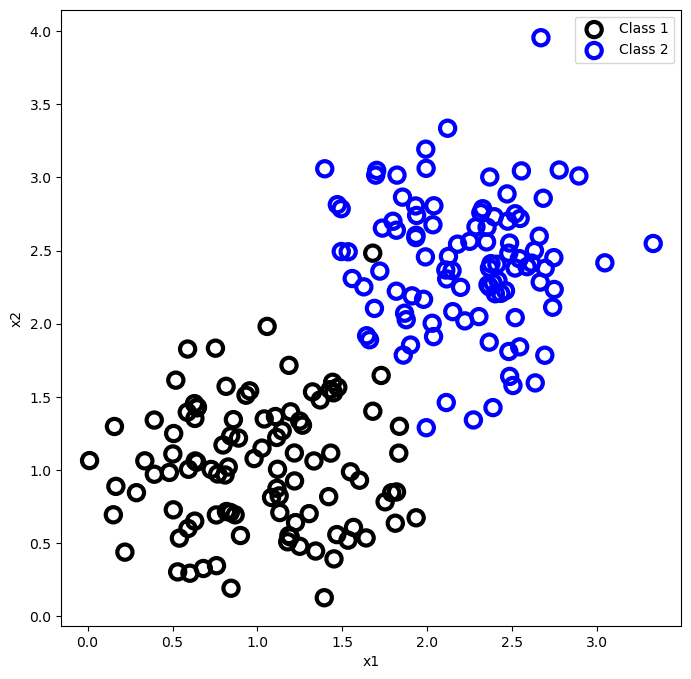

In [4]:
import numpy as np
import matplotlib.pyplot as plt

number_of_samples_in_each_class = 100

mu1 = np.array([1, 1])
mu2 = np.array([2.3, 2.3])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x_train_1 = np.random.multivariate_normal(mu1, sigma, number_of_samples_in_each_class)
x_train_2 = np.random.multivariate_normal(mu2, sigma, number_of_samples_in_each_class)
x_train = np.concatenate((x_train_1, x_train_2))
y_train = np.concatenate((np.ones(number_of_samples_in_each_class), np.zeros(number_of_samples_in_each_class)))

X = x_train
y = y_train

plt.figure(1, figsize=(8, 8))
plt.scatter(x_train_1[:, 0], x_train_1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x_train_2[:, 0], x_train_2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

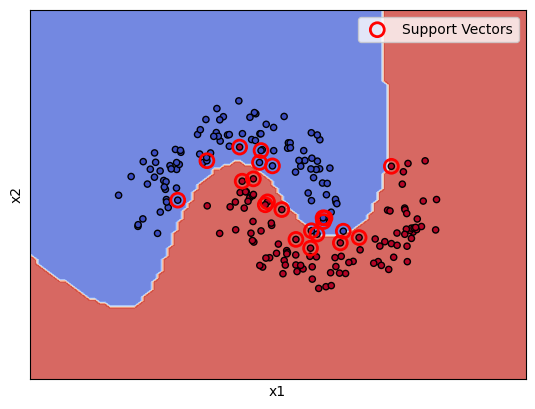

In [28]:

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

#plt.figure(1)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
#plt.show()

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

clf = svm.SVC(kernel='poly', C=1.0, coef0=1, degree=4)
clf.fit(X, y)

fig, sub = plt.subplots(1, 1)

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=sub,
    xlabel='x1',
    ylabel='x2',
)
sub.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
# Highlight support vectors
sub.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors='none',
    edgecolors='red',
    linewidths=2,
    label='Support Vectors'
)
sub.legend()
sub.set_xticks(())
sub.set_yticks(())

plt.show()

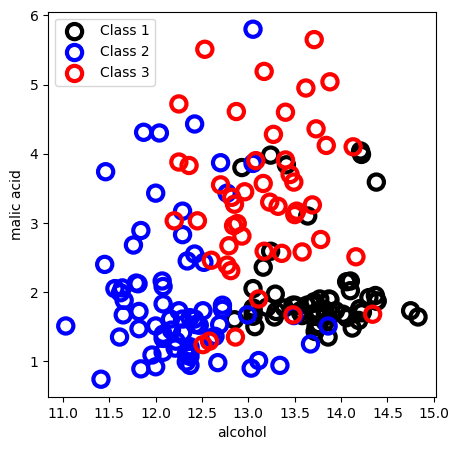

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# fetch dataset
wine_data = load_wine()

# data (as pandas dataframes)
X = wine_data.data[:, :2]
feature_1_name = 'alcohol'
feature_2_name = 'malic acid'
y = wine_data.target
y_names = np.unique(y)  # class names
colors = ['black', 'blue', 'red']

plt.figure(1, figsize=(5, 5))
for class_value, color in zip(y_names, colors):
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], s=120, facecolors='none',
                edgecolors=color, linewidth=3.0, label=f'Class {class_value+1}')
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.legend()
plt.show()


[[13.2   1.78]
 [13.16  2.36]
 [13.24  2.59]
 [13.64  3.1 ]
 [12.93  3.8 ]
 [12.85  1.6 ]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.41  3.84]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.05  1.73]
 [13.29  1.97]
 [13.67  1.25]
 [13.11  1.01]
 [13.34  0.94]
 [13.86  1.51]
 [13.49  1.66]
 [12.99  1.67]
 [13.03  0.9 ]
 [12.7   3.87]
 [12.72  1.81]
 [13.05  3.86]
 [12.69  1.53]
 [12.29  2.83]
 [12.29  3.17]
 [12.34  2.45]
 [12.42  2.55]
 [12.72  1.75]
 [12.52  2.43]
 [12.77  3.43]
 [12.    3.43]
 [12.42  4.43]
 [13.05  5.8 ]
 [11.87  4.31]
 [12.04  4.3 ]
 [12.86  1.35]
 [12.88  2.99]
 [12.81  2.31]
 [12.7   3.55]
 [12.51  1.24]
 [12.6   2.46]
 [12.25  4.72]
 [13.49  3.59]
 [12.84  2.96]
 [12.93  2.81]
 [13.36  2.56]
 [13.52  3.17]
 [12.25  3.88]
 [13.32  3.24]
 [13.5   3.12]
 [12.79  2.67]
 [13.11  1.9 ]
 [12.58  1.29]
 [13.84  4.12]
 [12.45  3.03]
 [14.34  1.68]
 [13.48  1.67]
 [12.36  3

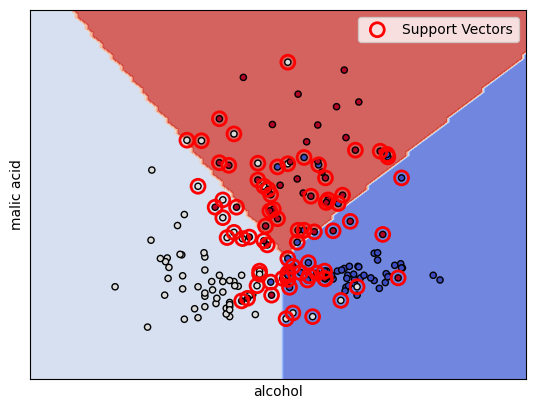

In [7]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

clf = svm.SVC(kernel='linear', C=100.0)
clf.fit(X, y)

print(clf.support_vectors_)

fig, sub = plt.subplots(1, 1)

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=sub,
    xlabel=feature_1_name,
    ylabel=feature_2_name,
)
sub.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
# Highlight support vectors
sub.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors='none',
    edgecolors='red',
    linewidths=2,
    label='Support Vectors'
)
sub.legend()
sub.set_xticks(())
sub.set_yticks(())

plt.show()

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.


### Wine classification with SVM

This problem is focused on multi-class classification of wine types based on 13 features. Below, we have simplified the problem by extracting 2 features. Take this as a starting point, but when you feel confident in your implementation, train your classifier on all 13 features. Does performance change?


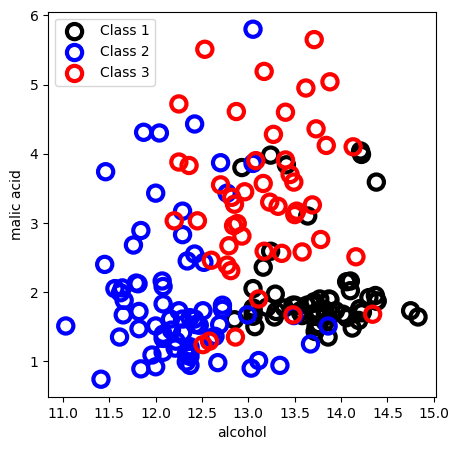

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# fetch dataset
wine_data = load_wine()

# data (as pandas dataframes)
X = wine_data.data[:, :2]
feature_1_name = 'alcohol'
feature_2_name = 'malic acid'
y = wine_data.target
y_names = np.unique(y)  # class names
colors = ['black', 'blue', 'red']

plt.figure(1, figsize=(5, 5))
for class_value, color in zip(y_names, colors):
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], s=120, facecolors='none',
                edgecolors=color, linewidth=3.0, label=f'Class {class_value+1}')
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.legend()
plt.show()
